<a href="https://colab.research.google.com/github/Plagistus/PythonAufgabe02/blob/master/ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
from matplotlib.colors import ListedColormap

In [ ]:
import pylab as pl

In [ ]:
# import Iris datenset
iris = datasets.load_iris()


In [ ]:
#set X,y - take the first two attributes for the iris data
X = iris.data[:, :2]
y = iris.target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
#setting the "quality" of the plots
h= .02

K_Value: 1
T_Value: 0.1
[[6 0 0]
 [0 3 3]
 [0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.50      0.67         6
           2       0.50      1.00      0.67         3

    accuracy                           0.80        15
   macro avg       0.83      0.83      0.78        15
weighted avg       0.90      0.80      0.80        15



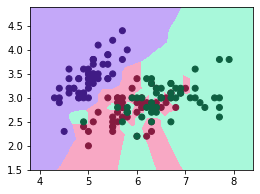

---------------------------------------------
K_Value: 3
T_Value: 0.1
[[6 0 0]
 [0 3 3]
 [0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.50      0.67         6
           2       0.50      1.00      0.67         3

    accuracy                           0.80        15
   macro avg       0.83      0.83      0.78        15
weighted avg       0.90      0.80      0.80        15



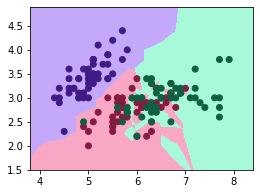

---------------------------------------------
K_Value: 15
T_Value: 0.1
[[6 0 0]
 [0 2 4]
 [0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.33      0.50         6
           2       0.43      1.00      0.60         3

    accuracy                           0.73        15
   macro avg       0.81      0.78      0.70        15
weighted avg       0.89      0.73      0.72        15



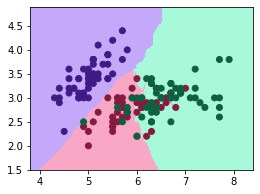

---------------------------------------------
K_Value: 1
T_Value: 0.3
[[19  0  0]
 [ 0  7  6]
 [ 0  7  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.50      0.54      0.52        13
           2       0.50      0.46      0.48        13

    accuracy                           0.71        45
   macro avg       0.67      0.67      0.67        45
weighted avg       0.71      0.71      0.71        45



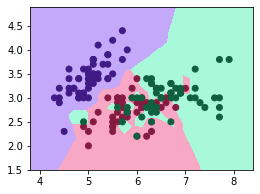

---------------------------------------------
K_Value: 3
T_Value: 0.3
[[19  0  0]
 [ 0  7  6]
 [ 0  5  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.58      0.54      0.56        13
           2       0.57      0.62      0.59        13

    accuracy                           0.76        45
   macro avg       0.72      0.72      0.72        45
weighted avg       0.76      0.76      0.76        45



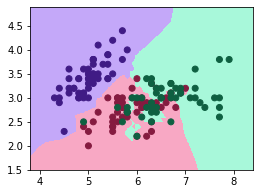

---------------------------------------------
K_Value: 15
T_Value: 0.3
[[19  0  0]
 [ 0  6  7]
 [ 0  3 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.67      0.46      0.55        13
           2       0.59      0.77      0.67        13

    accuracy                           0.78        45
   macro avg       0.75      0.74      0.74        45
weighted avg       0.78      0.78      0.77        45



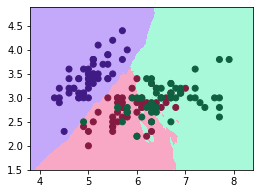

---------------------------------------------


In [ ]:
#arrays for test and k value
test_range = [0.10, 0.30]
k_range = [1,3,15]

cm_b = ListedColormap(['#C4A8F9', '#F8A8C4','#A8F8DA'])
cm_l = ListedColormap(['#401B85', '#851B40','#0E6041'])


for t in test_range:
  X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=t, random_state = 42)
  
  for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = knn.fit(X_train, y_train).predict(X_test)
    print(f"K_Value: {k}")
    print(f"T_Value: {t}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


    x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
    y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])


    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure(1, figsize=(4, 3))
    pl.set_cmap(pl.cm.Paired)
    pl.pcolormesh(xx, yy, Z, cm=cm_b)


    # Plot also the training points
    pl.scatter(X[:,0], X[:,1],c=y , cm=cm_l)
    pl.xlim(xx.min(), xx.max())
    pl.ylim(yy.min(), yy.max())


    pl.show()
    print("---------------------------------------------")
